In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os
import time

In [ ]:
dataName = 'Aug'

In [2]:
imgsTrain = np.load('imgsTrainAug.npy')
labelsTrain = np.load('labelsTrainAug.npy')


In [23]:
imgsTrain = imgsTrain[:,:,:,np.newaxis]

In [24]:
imgsTrain.shape

(55000, 28, 28, 1)

In [5]:
labelsTrain.shape

(550000, 10)

In [6]:
imgsTest = np.load('imgsTestAug.npy')
labelsTest = np.load('labelsTestAug.npy')

In [26]:
imgsTest = imgsTest[:,:,:,np.newaxis]
imgsTest.shape

(100000, 28, 28, 1)

In [8]:
labelsTest.shape

(100000, 10)

In [11]:
def weight_variable(shape):
	initial=tf.truncated_normal(shape,stddev=0.1)
	return tf.Variable(initial)

def bias_variable(shape):
	initialWeights =tf.constant(0.1,shape=shape)
	return tf.Variable(initialWeights)

def conv2d(x,W):
	return tf.nn.conv2d(x,W,strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
	return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [13]:
x_image=tf.placeholder(tf.float32,[None,28, 28, 1])
ys=tf.placeholder(tf.float32,[None,10])

keep_prob = tf.placeholder(tf.float32)

W_conv1=weight_variable([5,5,1,32])
b_conv1=bias_variable([32])

h_conv1=tf.nn.relu(conv2d(x_image,W_conv1)+b_conv1)
h_pool1=max_pool_2x2(h_conv1)

W_conv2=weight_variable([5,5,32,64])
b_conv2=bias_variable([64])

h_conv2=tf.nn.relu(conv2d(h_pool1,W_conv2)+b_conv2)
h_pool2=max_pool_2x2(h_conv2)

h_pool2_flat=tf.reshape(h_pool2,[-1,7*7*64])

W_fc1=weight_variable([7*7*64,1024])
b_fc1=bias_variable([1024])

h_fc1=tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)

W_fc2=weight_variable([1024,10])
b_fc2=bias_variable([10])

prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
cross_entropy=tf.reduce_mean(
    -tf.reduce_sum(ys*tf.log(prediction),
    reduction_indices=[1]))

train_step=tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)


In [14]:
sess = tf.Session()


In [15]:
init = tf.global_variables_initializer()
sess.run(init)

In [21]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={x_image: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={x_image: v_xs, ys: v_ys, keep_prob: 1})
    return result

In [35]:
accTrain = []
accTest = []
batchSize = 5000
# if readWeights:
#     saver = tf.train.Saver()
#     saver.restore(sess, "save/model.ckpt")
# else:
    
print(compute_accuracy(
           imgsTest[:1000], labelsTest[:1000]))

timeStart = time.clock()

numEpoch = 2000
printStep = 20
numBatchs = int(np.ceil(imgsTrain.shape[0] / batchSize))
for iEpoch in range(numEpoch):
    for iBatch in range(numBatchs):
        batchData = imgsTrain[iBatch*batchSize:(iBatch+1)*batchSize]
        gdData = labelsTrain[iBatch*batchSize:(iBatch+1)*batchSize, :]
        
        sess.run(train_step, feed_dict={x_image: batchData, ys: gdData, keep_prob: 0.90})
    
        if iEpoch % printStep == 0:
            accTrain.append(compute_accuracy(imgsTrain[:2000],
                                             labelsTrain[:2000]))
            accTest.append(compute_accuracy(
                imgsTest[:1000], labelsTest[:1000]))
            print("Train accuracy:", accTrain[-1], "Test accuracy:", accTest[-1], 
                  "Time:", time.clock()-timeStart,
                  "Loss on Train: ", sess.run(cross_entropy,feed_dict={x_image: batchData, ys: gdData, keep_prob: 1.0}))

os.makedirs("save", exist_ok=True)
saver = tf.train.Saver()
saver_path = saver.save(sess, "save/modelCNN.ckpt")



0.096


Train accuracy: 0.2735 Test accuracy: 0.099 Time: 0.543127 Loss on Train:  2.0797207


Train accuracy: 0.2765 Test accuracy: 0.101 Time: 1.1975086 Loss on Train:  2.067907


Train accuracy: 0.2765 Test accuracy: 0.1 Time: 1.7819132 Loss on Train:  2.0820925


Train accuracy: 0.279 Test accuracy: 0.098 Time: 2.3398463 Loss on Train:  2.0803814


Train accuracy: 0.28 Test accuracy: 0.1 Time: 2.9018097000000003 Loss on Train:  2.0909936


Train accuracy: 0.2785 Test accuracy: 0.096 Time: 3.4678021 Loss on Train:  2.071951


Train accuracy: 0.2715 Test accuracy: 0.095 Time: 4.0433372 Loss on Train:  2.0714607


Train accuracy: 0.2685 Test accuracy: 0.1 Time: 4.652021599999999 Loss on Train:  2.0828354


Train accuracy: 0.2655 Test accuracy: 0.108 Time: 5.2229966 Loss on Train:  2.0588746


Train accuracy: 0.2665 Test accuracy: 0.102 Time: 5.7964404 Loss on Train:  2.0761611


Train accuracy: 0.2685 Test accuracy: 0.099 Time: 6.3517813 Loss on Train:  2.0796647


Train accuracy: 0.316 Test accuracy: 0.095 Time: 27.6292431 Loss on Train:  1.9967645


Train accuracy: 0.322 Test accuracy: 0.098 Time: 28.2108733 Loss on Train:  1.9828628


Train accuracy: 0.3225 Test accuracy: 0.097 Time: 28.8038737 Loss on Train:  1.9949051


Train accuracy: 0.325 Test accuracy: 0.096 Time: 29.4267015 Loss on Train:  1.9910071


Train accuracy: 0.326 Test accuracy: 0.099 Time: 30.0065228 Loss on Train:  2.004326


Train accuracy: 0.326 Test accuracy: 0.1 Time: 30.5880387 Loss on Train:  1.9859428


Train accuracy: 0.325 Test accuracy: 0.1 Time: 31.2348768 Loss on Train:  1.9822676


Train accuracy: 0.3215 Test accuracy: 0.102 Time: 31.8246297 Loss on Train:  1.997996


Train accuracy: 0.32 Test accuracy: 0.104 Time: 32.4096109 Loss on Train:  1.9676478


Train accuracy: 0.3155 Test accuracy: 0.099 Time: 32.9979244 Loss on Train:  1.9892834


Train accuracy: 0.3155 Test accuracy: 0.098 Time: 33.6152167 Loss on Train:  1.9921663


Train accuracy: 0.3675 Test accuracy: 0.099 Time: 54.8436504 Loss on Train:  1.9000659


Train accuracy: 0.3745 Test accuracy: 0.099 Time: 55.4180847 Loss on Train:  1.8841081


Train accuracy: 0.3755 Test accuracy: 0.097 Time: 55.9998674 Loss on Train:  1.8945491


Train accuracy: 0.378 Test accuracy: 0.098 Time: 56.5712198 Loss on Train:  1.8889271


Train accuracy: 0.382 Test accuracy: 0.1 Time: 57.1546282 Loss on Train:  1.9041692


Train accuracy: 0.3835 Test accuracy: 0.101 Time: 57.7994017 Loss on Train:  1.8851066


Train accuracy: 0.381 Test accuracy: 0.103 Time: 58.394401 Loss on Train:  1.8803415


Train accuracy: 0.3715 Test accuracy: 0.106 Time: 58.9820591 Loss on Train:  1.9004465


Train accuracy: 0.3705 Test accuracy: 0.101 Time: 59.5874996 Loss on Train:  1.8625903


Train accuracy: 0.368 Test accuracy: 0.1 Time: 60.2187585 Loss on Train:  1.8879479


Train accuracy: 0.3675 Test accuracy: 0.101 Time: 60.8117283 Loss on Train:  1.8923421


Train accuracy: 0.429 Test accuracy: 0.096 Time: 82.1398719 Loss on Train:  1.7866806


Train accuracy: 0.4345 Test accuracy: 0.097 Time: 82.79997780000001 Loss on Train:  1.770541


Train accuracy: 0.432 Test accuracy: 0.099 Time: 83.39670190000001 Loss on Train:  1.7812511


Train accuracy: 0.435 Test accuracy: 0.104 Time: 83.9928958 Loss on Train:  1.7737942


Train accuracy: 0.4395 Test accuracy: 0.109 Time: 84.6647511 Loss on Train:  1.7901237


Train accuracy: 0.448 Test accuracy: 0.106 Time: 85.27083060000001 Loss on Train:  1.7700068


Train accuracy: 0.4395 Test accuracy: 0.102 Time: 85.9399815 Loss on Train:  1.7659795


Train accuracy: 0.4325 Test accuracy: 0.106 Time: 86.61858000000001 Loss on Train:  1.7895284


Train accuracy: 0.4335 Test accuracy: 0.11 Time: 87.23865640000001 Loss on Train:  1.7467034


Train accuracy: 0.4295 Test accuracy: 0.109 Time: 87.8542953 Loss on Train:  1.7754012


Train accuracy: 0.429 Test accuracy: 0.104 Time: 88.4761596 Loss on Train:  1.7769144


Train accuracy: 0.49 Test accuracy: 0.101 Time: 109.96793360000001 Loss on Train:  1.6648772


Train accuracy: 0.4905 Test accuracy: 0.097 Time: 110.5927494 Loss on Train:  1.6472142


Train accuracy: 0.491 Test accuracy: 0.099 Time: 111.2257526 Loss on Train:  1.6522565


Train accuracy: 0.489 Test accuracy: 0.102 Time: 111.8855291 Loss on Train:  1.6448075


Train accuracy: 0.495 Test accuracy: 0.109 Time: 112.51044660000001 Loss on Train:  1.6644512


Train accuracy: 0.4985 Test accuracy: 0.111 Time: 113.1368671 Loss on Train:  1.6440759


Train accuracy: 0.4975 Test accuracy: 0.103 Time: 113.76833450000001 Loss on Train:  1.6384579


Train accuracy: 0.494 Test accuracy: 0.102 Time: 114.40164370000001 Loss on Train:  1.6669513


Train accuracy: 0.4895 Test accuracy: 0.099 Time: 115.03109090000001 Loss on Train:  1.6151034


Train accuracy: 0.4855 Test accuracy: 0.097 Time: 115.7421267 Loss on Train:  1.6492524


Train accuracy: 0.4855 Test accuracy: 0.095 Time: 116.3769324 Loss on Train:  1.6512539


Train accuracy: 0.539 Test accuracy: 0.098 Time: 137.90779700000002 Loss on Train:  1.5315241


Train accuracy: 0.541 Test accuracy: 0.101 Time: 138.6005254 Loss on Train:  1.5127767


Train accuracy: 0.5425 Test accuracy: 0.107 Time: 139.234067 Loss on Train:  1.5162711


Train accuracy: 0.545 Test accuracy: 0.105 Time: 139.8783254 Loss on Train:  1.5082886


Train accuracy: 0.5515 Test accuracy: 0.114 Time: 140.6073199 Loss on Train:  1.5292106


Train accuracy: 0.5495 Test accuracy: 0.109 Time: 141.2525774 Loss on Train:  1.5079378


Train accuracy: 0.5485 Test accuracy: 0.109 Time: 141.902918 Loss on Train:  1.5043473


Train accuracy: 0.5455 Test accuracy: 0.107 Time: 142.5545601 Loss on Train:  1.5310805


Train accuracy: 0.54 Test accuracy: 0.1 Time: 143.201158 Loss on Train:  1.4750011


Train accuracy: 0.5375 Test accuracy: 0.1 Time: 143.8614973 Loss on Train:  1.5158296


Train accuracy: 0.538 Test accuracy: 0.094 Time: 144.52067780000002 Loss on Train:  1.5165261


Train accuracy: 0.593 Test accuracy: 0.108 Time: 166.2251407 Loss on Train:  1.3934758


Train accuracy: 0.594 Test accuracy: 0.11 Time: 166.8921503 Loss on Train:  1.3742594


Train accuracy: 0.6045 Test accuracy: 0.111 Time: 167.6271706 Loss on Train:  1.3763154


Train accuracy: 0.6015 Test accuracy: 0.11 Time: 168.29440780000002 Loss on Train:  1.3668956


Train accuracy: 0.601 Test accuracy: 0.111 Time: 168.97182850000002 Loss on Train:  1.3897333


Train accuracy: 0.6 Test accuracy: 0.11 Time: 169.721234 Loss on Train:  1.3691106


Train accuracy: 0.5985 Test accuracy: 0.111 Time: 170.3987702 Loss on Train:  1.3680084


Train accuracy: 0.6035 Test accuracy: 0.105 Time: 171.0761138 Loss on Train:  1.391686


Train accuracy: 0.6025 Test accuracy: 0.097 Time: 171.7628416 Loss on Train:  1.3335491


Train accuracy: 0.5965 Test accuracy: 0.095 Time: 172.4468684 Loss on Train:  1.3789766


Train accuracy: 0.5945 Test accuracy: 0.098 Time: 173.14837640000002 Loss on Train:  1.3774658


Train accuracy: 0.641 Test accuracy: 0.11 Time: 194.881248 Loss on Train:  1.2557737


Train accuracy: 0.645 Test accuracy: 0.112 Time: 195.577043 Loss on Train:  1.2350968


Train accuracy: 0.6455 Test accuracy: 0.112 Time: 196.3474591 Loss on Train:  1.2376944


Train accuracy: 0.653 Test accuracy: 0.111 Time: 197.0383433 Loss on Train:  1.2295685


Train accuracy: 0.653 Test accuracy: 0.109 Time: 197.7295517 Loss on Train:  1.254279


Train accuracy: 0.653 Test accuracy: 0.107 Time: 198.4259278 Loss on Train:  1.2321593


Train accuracy: 0.6495 Test accuracy: 0.105 Time: 199.1265904 Loss on Train:  1.2291231


Train accuracy: 0.652 Test accuracy: 0.107 Time: 199.82811370000002 Loss on Train:  1.252345


Train accuracy: 0.657 Test accuracy: 0.105 Time: 200.60753780000002 Loss on Train:  1.1967314


Train accuracy: 0.647 Test accuracy: 0.105 Time: 201.3162499 Loss on Train:  1.2428249


Train accuracy: 0.643 Test accuracy: 0.109 Time: 202.0262016 Loss on Train:  1.2389491


Train accuracy: 0.6905 Test accuracy: 0.114 Time: 223.9121151 Loss on Train:  1.1239736


Train accuracy: 0.696 Test accuracy: 0.113 Time: 224.6228931 Loss on Train:  1.101859


Train accuracy: 0.7 Test accuracy: 0.114 Time: 225.3543563 Loss on Train:  1.102577


Train accuracy: 0.7005 Test accuracy: 0.109 Time: 226.1354062 Loss on Train:  1.0913867


Train accuracy: 0.7005 Test accuracy: 0.114 Time: 226.8497285 Loss on Train:  1.1172146


Train accuracy: 0.7 Test accuracy: 0.114 Time: 227.6220197 Loss on Train:  1.094151


Train accuracy: 0.6995 Test accuracy: 0.11 Time: 228.3496579 Loss on Train:  1.0946149


Train accuracy: 0.7035 Test accuracy: 0.108 Time: 229.0751239 Loss on Train:  1.1163282


Train accuracy: 0.7075 Test accuracy: 0.108 Time: 229.8918289 Loss on Train:  1.0610697


Train accuracy: 0.7015 Test accuracy: 0.11 Time: 230.6203958 Loss on Train:  1.1100643


Train accuracy: 0.6995 Test accuracy: 0.112 Time: 231.3546053 Loss on Train:  1.1004512


Train accuracy: 0.7455 Test accuracy: 0.113 Time: 253.2237395 Loss on Train:  0.9946452


Train accuracy: 0.7455 Test accuracy: 0.118 Time: 253.963158 Loss on Train:  0.9745307


Train accuracy: 0.7485 Test accuracy: 0.114 Time: 254.6973269 Loss on Train:  0.97378296


Train accuracy: 0.7505 Test accuracy: 0.118 Time: 255.4352337 Loss on Train:  0.96404916


Train accuracy: 0.7445 Test accuracy: 0.112 Time: 256.172398 Loss on Train:  0.9899216


Train accuracy: 0.7415 Test accuracy: 0.113 Time: 257.0056749 Loss on Train:  0.9675266


Train accuracy: 0.743 Test accuracy: 0.105 Time: 257.7509599 Loss on Train:  0.9680282


Train accuracy: 0.7515 Test accuracy: 0.106 Time: 258.49717519999996 Loss on Train:  0.9884493


Train accuracy: 0.7525 Test accuracy: 0.111 Time: 259.32740909999995 Loss on Train:  0.9332812


Train accuracy: 0.747 Test accuracy: 0.107 Time: 260.0838281 Loss on Train:  0.9802657


Train accuracy: 0.747 Test accuracy: 0.108 Time: 260.8374591 Loss on Train:  0.97157145


Train accuracy: 0.782 Test accuracy: 0.118 Time: 282.71195819999997 Loss on Train:  0.8757808


Train accuracy: 0.784 Test accuracy: 0.119 Time: 283.4681606 Loss on Train:  0.8546637


Train accuracy: 0.7875 Test accuracy: 0.114 Time: 284.32557019999996 Loss on Train:  0.8549925


Train accuracy: 0.7885 Test accuracy: 0.117 Time: 285.0811169 Loss on Train:  0.8444299


Train accuracy: 0.7885 Test accuracy: 0.116 Time: 285.8694222 Loss on Train:  0.8702683


Train accuracy: 0.7865 Test accuracy: 0.113 Time: 286.7062433 Loss on Train:  0.8479363


Train accuracy: 0.786 Test accuracy: 0.112 Time: 287.4819677 Loss on Train:  0.8490404


Train accuracy: 0.785 Test accuracy: 0.106 Time: 288.25414409999996 Loss on Train:  0.86879915


Train accuracy: 0.791 Test accuracy: 0.105 Time: 289.03060359999995 Loss on Train:  0.8169013


Train accuracy: 0.7885 Test accuracy: 0.104 Time: 289.8042076 Loss on Train:  0.8614717


Train accuracy: 0.7865 Test accuracy: 0.111 Time: 290.66009679999996 Loss on Train:  0.847684


Train accuracy: 0.827 Test accuracy: 0.115 Time: 312.5388119 Loss on Train:  0.76637787


Train accuracy: 0.826 Test accuracy: 0.121 Time: 313.38495159999997 Loss on Train:  0.74744177


Train accuracy: 0.8285 Test accuracy: 0.118 Time: 314.1664813 Loss on Train:  0.74499065


Train accuracy: 0.834 Test accuracy: 0.111 Time: 314.95579449999997 Loss on Train:  0.73602307


Train accuracy: 0.832 Test accuracy: 0.112 Time: 315.80763809999996 Loss on Train:  0.7575779


Train accuracy: 0.822 Test accuracy: 0.115 Time: 316.59880269999996 Loss on Train:  0.7388587


Train accuracy: 0.8205 Test accuracy: 0.114 Time: 317.47488869999995 Loss on Train:  0.74049425


Train accuracy: 0.827 Test accuracy: 0.11 Time: 318.26710579999997 Loss on Train:  0.7575317


Train accuracy: 0.83 Test accuracy: 0.11 Time: 319.0589621 Loss on Train:  0.70923585


Train accuracy: 0.834 Test accuracy: 0.112 Time: 319.9468482 Loss on Train:  0.75071216


Train accuracy: 0.835 Test accuracy: 0.111 Time: 320.74496689999995 Loss on Train:  0.73897994


Train accuracy: 0.8585 Test accuracy: 0.121 Time: 342.752147 Loss on Train:  0.6673228


Train accuracy: 0.86 Test accuracy: 0.121 Time: 343.55737739999995 Loss on Train:  0.64906234


Train accuracy: 0.8575 Test accuracy: 0.12 Time: 344.3617056 Loss on Train:  0.64789927


Train accuracy: 0.8595 Test accuracy: 0.124 Time: 345.2500536 Loss on Train:  0.63962954


Train accuracy: 0.86 Test accuracy: 0.123 Time: 346.063605 Loss on Train:  0.6619562


Train accuracy: 0.8535 Test accuracy: 0.114 Time: 346.9681445 Loss on Train:  0.6446785


Train accuracy: 0.855 Test accuracy: 0.11 Time: 347.7860803 Loss on Train:  0.64671504


Train accuracy: 0.8565 Test accuracy: 0.103 Time: 348.59371999999996 Loss on Train:  0.66153705


Train accuracy: 0.856 Test accuracy: 0.104 Time: 349.5142494 Loss on Train:  0.61467046


Train accuracy: 0.858 Test accuracy: 0.103 Time: 350.33432569999997 Loss on Train:  0.65337735


Train accuracy: 0.8615 Test accuracy: 0.117 Time: 351.1594937 Loss on Train:  0.6389381


Train accuracy: 0.8875 Test accuracy: 0.117 Time: 373.01852219999995 Loss on Train:  0.5806357


Train accuracy: 0.8855 Test accuracy: 0.119 Time: 373.8636295 Loss on Train:  0.56635225


Train accuracy: 0.8775 Test accuracy: 0.122 Time: 374.7583977 Loss on Train:  0.5696174


Train accuracy: 0.883 Test accuracy: 0.125 Time: 375.5862259 Loss on Train:  0.5592841


Train accuracy: 0.8835 Test accuracy: 0.117 Time: 376.42109919999996 Loss on Train:  0.57580477


Train accuracy: 0.88 Test accuracy: 0.113 Time: 377.2591526 Loss on Train:  0.5564794


Train accuracy: 0.876 Test accuracy: 0.108 Time: 378.1909528 Loss on Train:  0.56149215


Train accuracy: 0.8705 Test accuracy: 0.105 Time: 379.03785869999996 Loss on Train:  0.5781123


Train accuracy: 0.873 Test accuracy: 0.101 Time: 379.88399019999997 Loss on Train:  0.5376865


Train accuracy: 0.882 Test accuracy: 0.105 Time: 380.81788509999996 Loss on Train:  0.56917334


Train accuracy: 0.8885 Test accuracy: 0.109 Time: 381.66558469999995 Loss on Train:  0.5533604


Train accuracy: 0.889 Test accuracy: 0.099 Time: 403.7502472 Loss on Train:  0.54430646


Train accuracy: 0.915 Test accuracy: 0.104 Time: 404.6035775 Loss on Train:  0.503087


Train accuracy: 0.9135 Test accuracy: 0.114 Time: 405.4620837 Loss on Train:  0.49044454


Train accuracy: 0.8865 Test accuracy: 0.124 Time: 406.31933399999997 Loss on Train:  0.49767518


Train accuracy: 0.864 Test accuracy: 0.123 Time: 407.1810324 Loss on Train:  0.54171485


Train accuracy: 0.862 Test accuracy: 0.122 Time: 408.14749009999997 Loss on Train:  0.52943045


Train accuracy: 0.8835 Test accuracy: 0.124 Time: 409.01835 Loss on Train:  0.5051641


Train accuracy: 0.9065 Test accuracy: 0.117 Time: 409.9844619 Loss on Train:  0.50358546


Train accuracy: 0.9025 Test accuracy: 0.109 Time: 410.85886769999996 Loss on Train:  0.46420377


Train accuracy: 0.892 Test accuracy: 0.102 Time: 411.7373813 Loss on Train:  0.51257956


Train accuracy: 0.879 Test accuracy: 0.101 Time: 412.60878069999995 Loss on Train:  0.5229573


Train accuracy: 0.9315 Test accuracy: 0.108 Time: 435.2462677 Loss on Train:  0.44356954


Train accuracy: 0.928 Test accuracy: 0.109 Time: 436.2151694 Loss on Train:  0.44503054


Train accuracy: 0.925 Test accuracy: 0.105 Time: 437.1284033 Loss on Train:  0.44785467


Train accuracy: 0.9295 Test accuracy: 0.108 Time: 438.16375239999996 Loss on Train:  0.43898708


Train accuracy: 0.9335 Test accuracy: 0.115 Time: 439.11737469999997 Loss on Train:  0.4452056


Train accuracy: 0.9275 Test accuracy: 0.115 Time: 440.1453327 Loss on Train:  0.4223933


Train accuracy: 0.9165 Test accuracy: 0.114 Time: 441.0688851 Loss on Train:  0.4306498


Train accuracy: 0.9025 Test accuracy: 0.115 Time: 442.0149004 Loss on Train:  0.4536068


Train accuracy: 0.9005 Test accuracy: 0.117 Time: 443.0090153 Loss on Train:  0.4216


Train accuracy: 0.9145 Test accuracy: 0.117 Time: 443.9382225 Loss on Train:  0.44874763


Train accuracy: 0.933 Test accuracy: 0.118 Time: 444.9457806 Loss on Train:  0.41403615


Train accuracy: 0.9375 Test accuracy: 0.112 Time: 467.0949611 Loss on Train:  0.4025777


Train accuracy: 0.9425 Test accuracy: 0.113 Time: 468.1227801 Loss on Train:  0.37746933


Train accuracy: 0.9435 Test accuracy: 0.113 Time: 469.0405105 Loss on Train:  0.37272203


Train accuracy: 0.941 Test accuracy: 0.116 Time: 470.0474605 Loss on Train:  0.36985543


Train accuracy: 0.9375 Test accuracy: 0.115 Time: 470.9763278 Loss on Train:  0.39513808


Train accuracy: 0.9355 Test accuracy: 0.115 Time: 471.9234515 Loss on Train:  0.37872458


Train accuracy: 0.9355 Test accuracy: 0.113 Time: 472.93970199999995 Loss on Train:  0.37403


Train accuracy: 0.9405 Test accuracy: 0.116 Time: 473.87162179999996 Loss on Train:  0.38295752


Train accuracy: 0.9435 Test accuracy: 0.115 Time: 474.81311139999997 Loss on Train:  0.35411578


Train accuracy: 0.94 Test accuracy: 0.116 Time: 475.7545793 Loss on Train:  0.3826389


Train accuracy: 0.935 Test accuracy: 0.109 Time: 476.70722279999995 Loss on Train:  0.3670802


Train accuracy: 0.9535 Test accuracy: 0.123 Time: 498.73538429999996 Loss on Train:  0.34042332


Train accuracy: 0.952 Test accuracy: 0.12 Time: 499.7801791 Loss on Train:  0.3255722


Train accuracy: 0.953 Test accuracy: 0.118 Time: 500.742827 Loss on Train:  0.3266046


Train accuracy: 0.9555 Test accuracy: 0.115 Time: 501.7871039 Loss on Train:  0.3189781


Train accuracy: 0.955 Test accuracy: 0.117 Time: 502.753354 Loss on Train:  0.33489552


Train accuracy: 0.9515 Test accuracy: 0.113 Time: 503.71195609999995 Loss on Train:  0.3217559


Train accuracy: 0.9505 Test accuracy: 0.116 Time: 504.6839257 Loss on Train:  0.3218203


Train accuracy: 0.9515 Test accuracy: 0.114 Time: 505.69285399999995 Loss on Train:  0.33226123


Train accuracy: 0.955 Test accuracy: 0.117 Time: 506.7628329 Loss on Train:  0.30865407


Train accuracy: 0.9585 Test accuracy: 0.119 Time: 507.74756759999997 Loss on Train:  0.32985714


Train accuracy: 0.9555 Test accuracy: 0.126 Time: 508.82213459999997 Loss on Train:  0.3126055


Train accuracy: 0.962 Test accuracy: 0.124 Time: 530.8777538 Loss on Train:  0.29486778


Train accuracy: 0.963 Test accuracy: 0.121 Time: 532.0076787 Loss on Train:  0.28272268


Train accuracy: 0.9635 Test accuracy: 0.119 Time: 533.0194928000001 Loss on Train:  0.28364924


Train accuracy: 0.9635 Test accuracy: 0.12 Time: 534.1193771000001 Loss on Train:  0.27640006


Train accuracy: 0.961 Test accuracy: 0.114 Time: 535.1227644 Loss on Train:  0.29123336


Train accuracy: 0.958 Test accuracy: 0.113 Time: 536.2327557 Loss on Train:  0.28065738


Train accuracy: 0.958 Test accuracy: 0.115 Time: 537.2525517 Loss on Train:  0.28080168


Train accuracy: 0.9585 Test accuracy: 0.115 Time: 538.3870943000001 Loss on Train:  0.2876009


Train accuracy: 0.9615 Test accuracy: 0.116 Time: 539.4056 Loss on Train:  0.26857308


Train accuracy: 0.965 Test accuracy: 0.119 Time: 540.5499104 Loss on Train:  0.28727984


Train accuracy: 0.9635 Test accuracy: 0.122 Time: 541.5882750000001 Loss on Train:  0.27102587


Train accuracy: 0.9665 Test accuracy: 0.126 Time: 563.6856474 Loss on Train:  0.25663614


Train accuracy: 0.9665 Test accuracy: 0.126 Time: 564.7253835 Loss on Train:  0.24391942


Train accuracy: 0.9665 Test accuracy: 0.123 Time: 565.7875596 Loss on Train:  0.24846427


Train accuracy: 0.969 Test accuracy: 0.119 Time: 566.9028044 Loss on Train:  0.24164957


Train accuracy: 0.969 Test accuracy: 0.118 Time: 567.9760486 Loss on Train:  0.25463545


Train accuracy: 0.9665 Test accuracy: 0.115 Time: 569.1114565 Loss on Train:  0.24466544


Train accuracy: 0.9655 Test accuracy: 0.116 Time: 570.1568212000001 Loss on Train:  0.2464806


Train accuracy: 0.964 Test accuracy: 0.116 Time: 571.2183656000001 Loss on Train:  0.25140515


Train accuracy: 0.968 Test accuracy: 0.118 Time: 572.2754821000001 Loss on Train:  0.23526949


Train accuracy: 0.97 Test accuracy: 0.119 Time: 573.4634324 Loss on Train:  0.25074503


Train accuracy: 0.9705 Test accuracy: 0.123 Time: 574.5258139 Loss on Train:  0.23525997


Train accuracy: 0.972 Test accuracy: 0.126 Time: 596.7055451 Loss on Train:  0.22437291


Train accuracy: 0.9705 Test accuracy: 0.125 Time: 597.7721847 Loss on Train:  0.21403468


Train accuracy: 0.9725 Test accuracy: 0.124 Time: 598.9567011 Loss on Train:  0.21961124


Train accuracy: 0.9715 Test accuracy: 0.124 Time: 600.0262582 Loss on Train:  0.21097979


Train accuracy: 0.971 Test accuracy: 0.122 Time: 601.1958387000001 Loss on Train:  0.22291371


Train accuracy: 0.971 Test accuracy: 0.117 Time: 602.2640957 Loss on Train:  0.21463466


Train accuracy: 0.969 Test accuracy: 0.113 Time: 603.4297133 Loss on Train:  0.21734503


Train accuracy: 0.967 Test accuracy: 0.116 Time: 604.5071613 Loss on Train:  0.22055258


Train accuracy: 0.969 Test accuracy: 0.115 Time: 605.7502212 Loss on Train:  0.2060755


Train accuracy: 0.9725 Test accuracy: 0.119 Time: 606.9197212 Loss on Train:  0.21900058


Train accuracy: 0.9735 Test accuracy: 0.122 Time: 608.0788665 Loss on Train:  0.20519198


Train accuracy: 0.9755 Test accuracy: 0.124 Time: 631.0568830000001 Loss on Train:  0.1968866


Train accuracy: 0.9745 Test accuracy: 0.121 Time: 632.2794743000001 Loss on Train:  0.1914188


Train accuracy: 0.975 Test accuracy: 0.119 Time: 633.3867835 Loss on Train:  0.1963951


Train accuracy: 0.9755 Test accuracy: 0.12 Time: 634.6198566 Loss on Train:  0.18699025


Train accuracy: 0.9755 Test accuracy: 0.119 Time: 635.7458327 Loss on Train:  0.1963117


Train accuracy: 0.974 Test accuracy: 0.115 Time: 636.9642184 Loss on Train:  0.18906373


Train accuracy: 0.972 Test accuracy: 0.117 Time: 638.0817352 Loss on Train:  0.19395962


Train accuracy: 0.9685 Test accuracy: 0.111 Time: 639.3282866000001 Loss on Train:  0.19832987


Train accuracy: 0.97 Test accuracy: 0.115 Time: 640.4567175000001 Loss on Train:  0.18614826


Train accuracy: 0.9745 Test accuracy: 0.113 Time: 641.6860098000001 Loss on Train:  0.19345567


Train accuracy: 0.9755 Test accuracy: 0.122 Time: 642.8327313 Loss on Train:  0.17941605


Train accuracy: 0.977 Test accuracy: 0.116 Time: 665.4247019000001 Loss on Train:  0.17366792


Train accuracy: 0.9775 Test accuracy: 0.122 Time: 666.565509 Loss on Train:  0.1685077


Train accuracy: 0.973 Test accuracy: 0.117 Time: 667.8516298000001 Loss on Train:  0.1851912


Train accuracy: 0.9665 Test accuracy: 0.124 Time: 669.0065291000001 Loss on Train:  0.186135


Train accuracy: 0.9715 Test accuracy: 0.124 Time: 670.1538823000001 Loss on Train:  0.19307697


Train accuracy: 0.9775 Test accuracy: 0.121 Time: 671.3358643 Loss on Train:  0.17510211


Train accuracy: 0.9775 Test accuracy: 0.123 Time: 672.5959579 Loss on Train:  0.168198


Train accuracy: 0.971 Test accuracy: 0.116 Time: 673.7883538 Loss on Train:  0.18010503


Train accuracy: 0.96 Test accuracy: 0.112 Time: 675.0417093 Loss on Train:  0.18293771


Train accuracy: 0.9655 Test accuracy: 0.113 Time: 676.2403117 Loss on Train:  0.19373257


Train accuracy: 0.9755 Test accuracy: 0.114 Time: 677.5167502 Loss on Train:  0.1701449


Train accuracy: 0.9815 Test accuracy: 0.12 Time: 700.0853433000001 Loss on Train:  0.15779404


Train accuracy: 0.9815 Test accuracy: 0.123 Time: 701.3094897000001 Loss on Train:  0.15545379


Train accuracy: 0.982 Test accuracy: 0.124 Time: 702.6439574000001 Loss on Train:  0.16333954


Train accuracy: 0.9845 Test accuracy: 0.126 Time: 703.8551244 Loss on Train:  0.15633114


Train accuracy: 0.98 Test accuracy: 0.121 Time: 705.1523682000001 Loss on Train:  0.15685152


Train accuracy: 0.9805 Test accuracy: 0.118 Time: 706.3652891 Loss on Train:  0.1504546


Train accuracy: 0.9715 Test accuracy: 0.114 Time: 707.5930519 Loss on Train:  0.15557021


Train accuracy: 0.971 Test accuracy: 0.118 Time: 708.8120155 Loss on Train:  0.16977735


Train accuracy: 0.9725 Test accuracy: 0.115 Time: 710.1712757 Loss on Train:  0.15442313


Train accuracy: 0.975 Test accuracy: 0.125 Time: 711.4279585 Loss on Train:  0.15969263


Train accuracy: 0.982 Test accuracy: 0.121 Time: 712.6800069000001 Loss on Train:  0.14352998


Train accuracy: 0.976 Test accuracy: 0.109 Time: 735.0397982000001 Loss on Train:  0.16490099


Train accuracy: 0.9805 Test accuracy: 0.116 Time: 736.3708583 Loss on Train:  0.14913367


Train accuracy: 0.982 Test accuracy: 0.119 Time: 737.6153443000001 Loss on Train:  0.14096747


Train accuracy: 0.982 Test accuracy: 0.122 Time: 738.8414884 Loss on Train:  0.13496602


Train accuracy: 0.981 Test accuracy: 0.126 Time: 740.1076867 Loss on Train:  0.15138063


Train accuracy: 0.98 Test accuracy: 0.128 Time: 741.4465778 Loss on Train:  0.1560455


Train accuracy: 0.9805 Test accuracy: 0.129 Time: 742.6994708000001 Loss on Train:  0.15465371


Train accuracy: 0.9835 Test accuracy: 0.126 Time: 743.9537868 Loss on Train:  0.14619647


Train accuracy: 0.982 Test accuracy: 0.125 Time: 745.3290219 Loss on Train:  0.1332359


Train accuracy: 0.9805 Test accuracy: 0.123 Time: 746.5877254000001 Loss on Train:  0.14189269


Train accuracy: 0.9765 Test accuracy: 0.115 Time: 747.9849778 Loss on Train:  0.1411152


Train accuracy: 0.9855 Test accuracy: 0.121 Time: 770.1711584000001 Loss on Train:  0.122731514


Train accuracy: 0.9855 Test accuracy: 0.119 Time: 771.4220935000001 Loss on Train:  0.11770317


Train accuracy: 0.984 Test accuracy: 0.124 Time: 772.6829633 Loss on Train:  0.12532732


Train accuracy: 0.9815 Test accuracy: 0.123 Time: 774.0641273 Loss on Train:  0.12553181


Train accuracy: 0.9845 Test accuracy: 0.125 Time: 775.3834315 Loss on Train:  0.12841317


Train accuracy: 0.989 Test accuracy: 0.123 Time: 776.7530866000001 Loss on Train:  0.12136497


Train accuracy: 0.988 Test accuracy: 0.122 Time: 778.0418824000001 Loss on Train:  0.118214816


Train accuracy: 0.986 Test accuracy: 0.122 Time: 779.3306097000001 Loss on Train:  0.12401993


Train accuracy: 0.984 Test accuracy: 0.122 Time: 780.7466354000001 Loss on Train:  0.12398945


Train accuracy: 0.9845 Test accuracy: 0.122 Time: 782.051853 Loss on Train:  0.13088797


Train accuracy: 0.9855 Test accuracy: 0.121 Time: 783.4910674 Loss on Train:  0.115913056


Train accuracy: 0.9845 Test accuracy: 0.116 Time: 805.7573100000001 Loss on Train:  0.11967553


Train accuracy: 0.9845 Test accuracy: 0.114 Time: 807.1834098 Loss on Train:  0.11967362


Train accuracy: 0.9855 Test accuracy: 0.116 Time: 808.5030345 Loss on Train:  0.11722893


Train accuracy: 0.987 Test accuracy: 0.119 Time: 809.8211145 Loss on Train:  0.10865994


Train accuracy: 0.9865 Test accuracy: 0.124 Time: 811.1771987000001 Loss on Train:  0.11252586


Train accuracy: 0.9855 Test accuracy: 0.123 Time: 812.6378317 Loss on Train:  0.1138706


Train accuracy: 0.982 Test accuracy: 0.123 Time: 814.1147517 Loss on Train:  0.11429559


Train accuracy: 0.983 Test accuracy: 0.121 Time: 815.464066 Loss on Train:  0.11964458


Train accuracy: 0.9865 Test accuracy: 0.12 Time: 816.9628399000001 Loss on Train:  0.11004724


Train accuracy: 0.988 Test accuracy: 0.122 Time: 818.3195350000001 Loss on Train:  0.11299987


Train accuracy: 0.9845 Test accuracy: 0.117 Time: 819.7989601 Loss on Train:  0.103171244


Train accuracy: 0.989 Test accuracy: 0.123 Time: 842.06672 Loss on Train:  0.098404594


Train accuracy: 0.9885 Test accuracy: 0.124 Time: 843.5251149000001 Loss on Train:  0.09464246


Train accuracy: 0.9875 Test accuracy: 0.125 Time: 844.9966552000001 Loss on Train:  0.097795255


Train accuracy: 0.988 Test accuracy: 0.125 Time: 846.3581259 Loss on Train:  0.09523554


Train accuracy: 0.99 Test accuracy: 0.131 Time: 847.8632226000001 Loss on Train:  0.10098092


Train accuracy: 0.991 Test accuracy: 0.129 Time: 849.2387519 Loss on Train:  0.09827559


Train accuracy: 0.99 Test accuracy: 0.124 Time: 850.7642766 Loss on Train:  0.09558211


Train accuracy: 0.9905 Test accuracy: 0.123 Time: 852.1511985000001 Loss on Train:  0.0990601


Train accuracy: 0.9895 Test accuracy: 0.121 Time: 853.5392245 Loss on Train:  0.09585801


Train accuracy: 0.9885 Test accuracy: 0.119 Time: 854.9262538 Loss on Train:  0.10200649


Train accuracy: 0.9895 Test accuracy: 0.123 Time: 856.3346228 Loss on Train:  0.09128041


Train accuracy: 0.9915 Test accuracy: 0.125 Time: 878.7551883 Loss on Train:  0.08929515


Train accuracy: 0.9925 Test accuracy: 0.122 Time: 880.1665328 Loss on Train:  0.08421898


Train accuracy: 0.991 Test accuracy: 0.126 Time: 881.7326835 Loss on Train:  0.087188676


Train accuracy: 0.99 Test accuracy: 0.125 Time: 883.1774770000001 Loss on Train:  0.08619076


Train accuracy: 0.9895 Test accuracy: 0.127 Time: 884.7237098 Loss on Train:  0.091721706


Train accuracy: 0.9905 Test accuracy: 0.126 Time: 886.3135241 Loss on Train:  0.089596905


Train accuracy: 0.991 Test accuracy: 0.127 Time: 890.8323266 Loss on Train:  0.08603021


Train accuracy: 0.9915 Test accuracy: 0.123 Time: 892.4301563 Loss on Train:  0.088925906


Train accuracy: 0.99 Test accuracy: 0.127 Time: 893.8854559 Loss on Train:  0.08648939


Train accuracy: 0.99 Test accuracy: 0.122 Time: 895.4807929 Loss on Train:  0.09225968


Train accuracy: 0.9905 Test accuracy: 0.121 Time: 896.976661 Loss on Train:  0.08333747


Train accuracy: 0.992 Test accuracy: 0.124 Time: 919.3704584000001 Loss on Train:  0.080516055


Train accuracy: 0.9925 Test accuracy: 0.124 Time: 920.8477983 Loss on Train:  0.0744257


Train accuracy: 0.993 Test accuracy: 0.127 Time: 922.3335092 Loss on Train:  0.078027815


Train accuracy: 0.991 Test accuracy: 0.127 Time: 923.9272917000001 Loss on Train:  0.07692199


Train accuracy: 0.99 Test accuracy: 0.127 Time: 925.4667639 Loss on Train:  0.08340046


Train accuracy: 0.9895 Test accuracy: 0.126 Time: 927.0906519 Loss on Train:  0.08266655


Train accuracy: 0.9925 Test accuracy: 0.123 Time: 928.73846 Loss on Train:  0.07790562


Train accuracy: 0.994 Test accuracy: 0.125 Time: 930.3370580000001 Loss on Train:  0.07924916


Train accuracy: 0.994 Test accuracy: 0.125 Time: 931.8506915 Loss on Train:  0.07723183


Train accuracy: 0.9925 Test accuracy: 0.127 Time: 933.3817233000001 Loss on Train:  0.08271869


Train accuracy: 0.992 Test accuracy: 0.125 Time: 934.9133715 Loss on Train:  0.07562308


KeyboardInterrupt: 

0.124


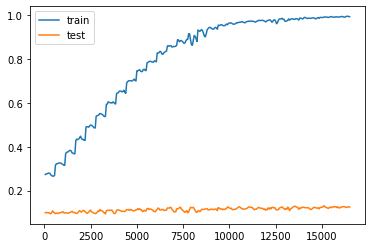

In [36]:
fig, axs = plt.subplots()
x = [(i+1)*50 for i in range(len(accTrain))]

axs.plot(x, accTrain, label='train')
x = [(i+1)*50 for i in range(len(accTest))]
axs.plot(x, accTest, label='test')
axs.legend()
fig.savefig("lossCNN_Aug.pdf", dpi=300, transparent=True, bbox_inches='tight', pad_inches=0)

print(compute_accuracy(
    imgsTest[:1000], labelsTest[:1000]))